In [1]:
import pandas as pd
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [2]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [3]:
df[df.duplicated()]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


In [4]:
discrete = []
continuous = []
for feature in df.columns:
    if len(df[feature].unique()) > 2:
        continuous.append(feature)
    elif feature == 'DEATH_EVENT':
        label = feature
    else:
        discrete.append(feature)
        

In [5]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range=(0,1))
scale.fit(df[continuous])
scaled_continuous = scale.transform(df[continuous])
scaled_continuous = pd.DataFrame(data=scaled_continuous, columns=['age','creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time' ])
scaled = pd.concat([df[discrete], scaled_continuous, df['DEATH_EVENT']], axis=1)
scaled.head()

,anaemia,diabetes,high_blood_pressure,sex,smoking,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,0,0,1,1,0,0.636364,0.071319,0.090909,0.290823,0.157303,0.485714,0.000000,1
1,0,0,0,1,0,0.272727,1.000000,0.363636,0.288833,0.067416,0.657143,0.007117,1
2,0,0,0,1,1,0.454545,0.015693,0.090909,0.165960,0.089888,0.457143,0.010676,1
3,1,0,0,1,0,0.181818,0.011227,0.090909,0.224148,0.157303,0.685714,0.010676,1
4,1,1,0,0,0,0.454545,0.017479,0.090909,0.365984,0.247191,0.085714,0.014235,1


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(scaled.iloc[:,:-1], scaled.iloc[:,-1], random_state=20, stratify = scaled['DEATH_EVENT'], test_size = 0.2)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from copy import deepcopy
max=0
max_x_train = ()
max_y_train = ()
max_x_valid = ()
max_y_valid = ()

dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(x_train, y_train)

depth = dt_model.get_depth()

for i in range(depth):
    dt_model = DecisionTreeClassifier(max_depth=(i+1))
    dt_model.fit(x_train, y_train)
    pred = dt_model.predict(x_valid)

    accuracy = accuracy_score(y_valid, pred)
    if accuracy > max:
        max = accuracy
        max_dt_model = deepcopy(dt_model)
        max_x_train = deepcopy(x_train)
        max_y_train = deepcopy(y_train)
        max_x_valid = deepcopy(x_valid)
        max_y_valid = deepcopy(y_valid)


pred = max_dt_model.predict(max_x_valid)
print(confusion_matrix(max_y_valid, pred))

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(max_y_valid, pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(max_y_valid, pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(max_y_valid, pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(max_y_valid, pred)
print('F-score: %f' % f1)

[[37  4]
 [ 6 13]]
Accuracy: 0.833333
Precision: 0.764706
Recall: 0.684211
F-score: 0.722222


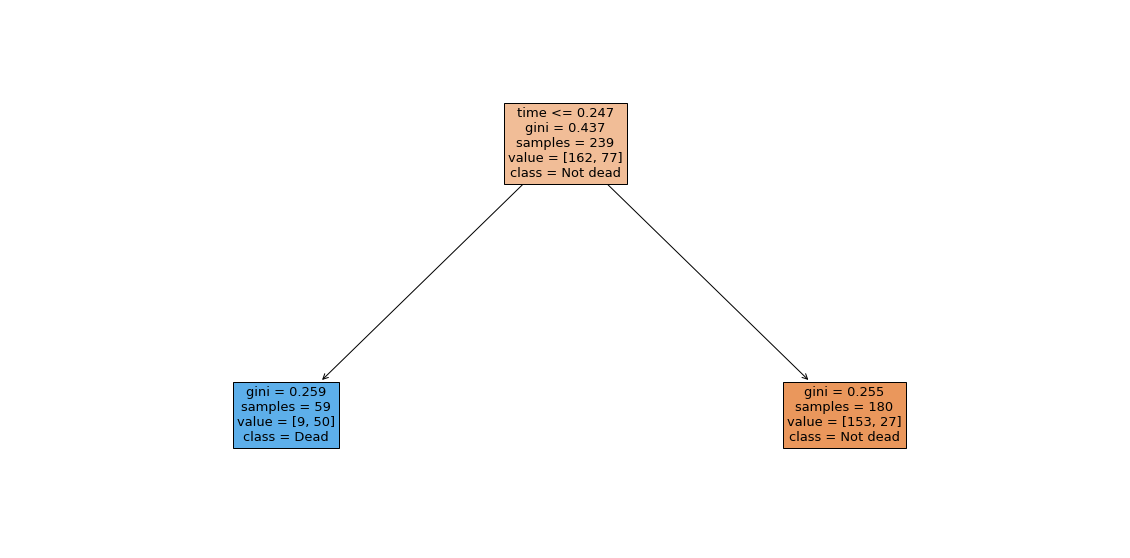

In [8]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.subplots(figsize=(20,10))
plot_tree(max_dt_model, fontsize=13, feature_names=scaled.columns, class_names=['Not dead', 'Dead'], filled=True)
plt.show()

In [9]:
from sklearn.ensemble import RandomForestClassifier
from copy import deepcopy
max=0
max_x_train = ()
max_y_train = ()
max_x_valid = ()
max_y_valid = ()
for i in range(1000):
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=2)
    rf_model.fit(x_train, y_train)

    pred = rf_model.predict(x_valid)

    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_valid, pred)
    #print('Accuracy: %f' % accuracy)
    if accuracy > max:
        max = accuracy
        max_rf_model = deepcopy(rf_model)
        max_x_train = deepcopy(x_train)
        max_y_train = deepcopy(y_train)
        max_x_valid = deepcopy(x_valid)
        max_y_valid = deepcopy(y_valid)

pred = max_rf_model.predict(max_x_valid)
print(confusion_matrix(max_y_valid, pred))

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(max_y_valid, pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(max_y_valid, pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(max_y_valid, pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(max_y_valid, pred)
print('F-score: %f' % f1)

[[40  1]
 [ 7 12]]
Accuracy: 0.866667
Precision: 0.923077
Recall: 0.631579
F-score: 0.750000


In [10]:
from sklearn.ensemble import BaggingClassifier
from copy import deepcopy
max=0
max_x_train = ()
max_y_train = ()
max_x_valid = ()
max_y_valid = ()


for i in range(1000):
    #print(i)
    bg_model = BaggingClassifier()
    bg_model.fit(x_train, y_train)

    pred = bg_model.predict(x_valid)

    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_valid, pred)
    #print('Accuracy: %f' % accuracy)
    if accuracy > max:
        max = accuracy
        max_bg_model = deepcopy(bg_model)
        max_x_train = deepcopy(x_train)
        max_y_train = deepcopy(y_train)
        max_x_valid = deepcopy(x_valid)
        max_y_valid = deepcopy(y_valid)
        
pred = max_bg_model.predict(max_x_valid)
print(confusion_matrix(max_y_valid, pred))

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(max_y_valid, pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(max_y_valid, pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(max_y_valid, pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(max_y_valid, pred)
print('F-score: %f' % f1)

[[37  4]
 [ 4 15]]
Accuracy: 0.866667
Precision: 0.789474
Recall: 0.789474
F-score: 0.789474


In [11]:
from sklearn.naive_bayes import GaussianNB
gauss_model = GaussianNB()
gauss_model.fit(x_train, y_train)
print("Train Accuracy:")
gauss_model.score(x_train, y_train)

Train Accuracy:


0.7824267782426778

In [12]:
print("Test Accuracy:")
gauss_model.score(x_valid, y_valid)

Test Accuracy:


0.8

In [13]:
pred = gauss_model.predict(x_valid)
print(confusion_matrix(y_valid, pred))

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_valid, pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_valid, pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_valid, pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_valid, pred)
print('F-score: %f' % f1)

[[38  3]
 [ 9 10]]
Accuracy: 0.800000
Precision: 0.769231
Recall: 0.526316
F-score: 0.625000
